# Analyzing and Classifying Breast Cancer Dataset

![Image of Breast cancer dataset](http://curiousily.com/assets/1.diagnosing_breast_cancer_files/biopsy.jpg)



# Loading the breast cancer dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# load the dataset
cancerData = load_breast_cancer()
print("Keys of breast_cancer_dataset: {}".format(cancerData.keys()))
print(cancerData['DESCR'][:193] + "\n")
print("Target names: {}".format(cancerData['target_names']))
print("Feature names: {}".format(cancerData['feature_names']))
print("Type of data: {}".format(type(cancerData['data'])))
print("Type of target: {}".format(type(cancerData['target'])))
print("Shape of data: {}".format(cancerData['data'].shape))
print("Shape of target: {}".format(cancerData['target'].shape))
#print("Target:\n{}".format(cancerData['target']))

# build and print the data frame
data = np.c_[cancerData.data, cancerData.target]
columns = np.append(cancerData.feature_names, ["target"])
cancerdf = pd.DataFrame(data, columns=columns)
cancerdf.info()

# find the malignant and benign counts
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print(counts)

Keys of breast_cancer_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 n

Target names: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Type of data: <class 'numpy.ndarray'>
Type of target: <class 'numpy.ndarray'>
Shape of data: (569, 30)
Shape of target: (569,)
<class 'pandas

In [3]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Data preprocessing

In [4]:
# in our dataset is there any empty value that is denoted with "?", let's check that
cancerdf.isin(["?"]).any()

# as we will see that there is no empty value in the dataset so we don't need to take any extra steps to fix that

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

## Visualizing the data

In this section we will build visualizations by using the Seaborn and the Matplotlib packages.

We are interested mainly in the mean values of the features, so we will separate those features in the list below.

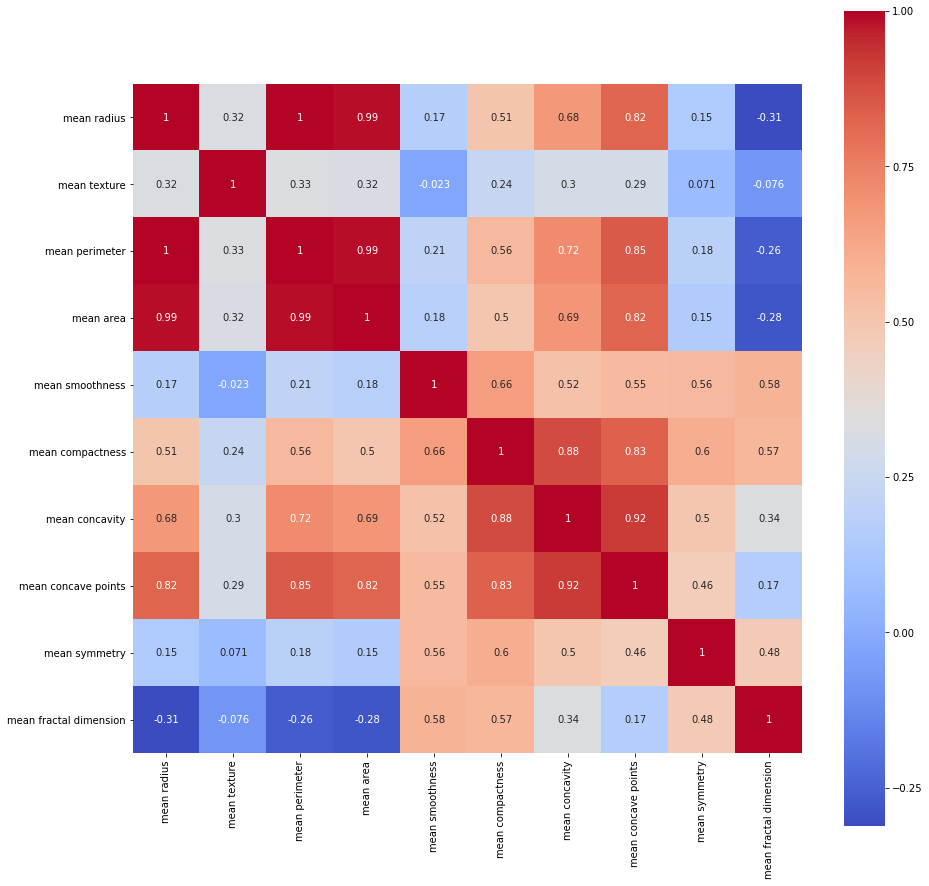

In [5]:
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

features_mean= list(cancerdf.columns[0:10])
plt.figure(figsize=(15,15))
sns.heatmap(cancerdf[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Following `box plots` is also a great way to visualize the distribution of the target for each of the feature value.

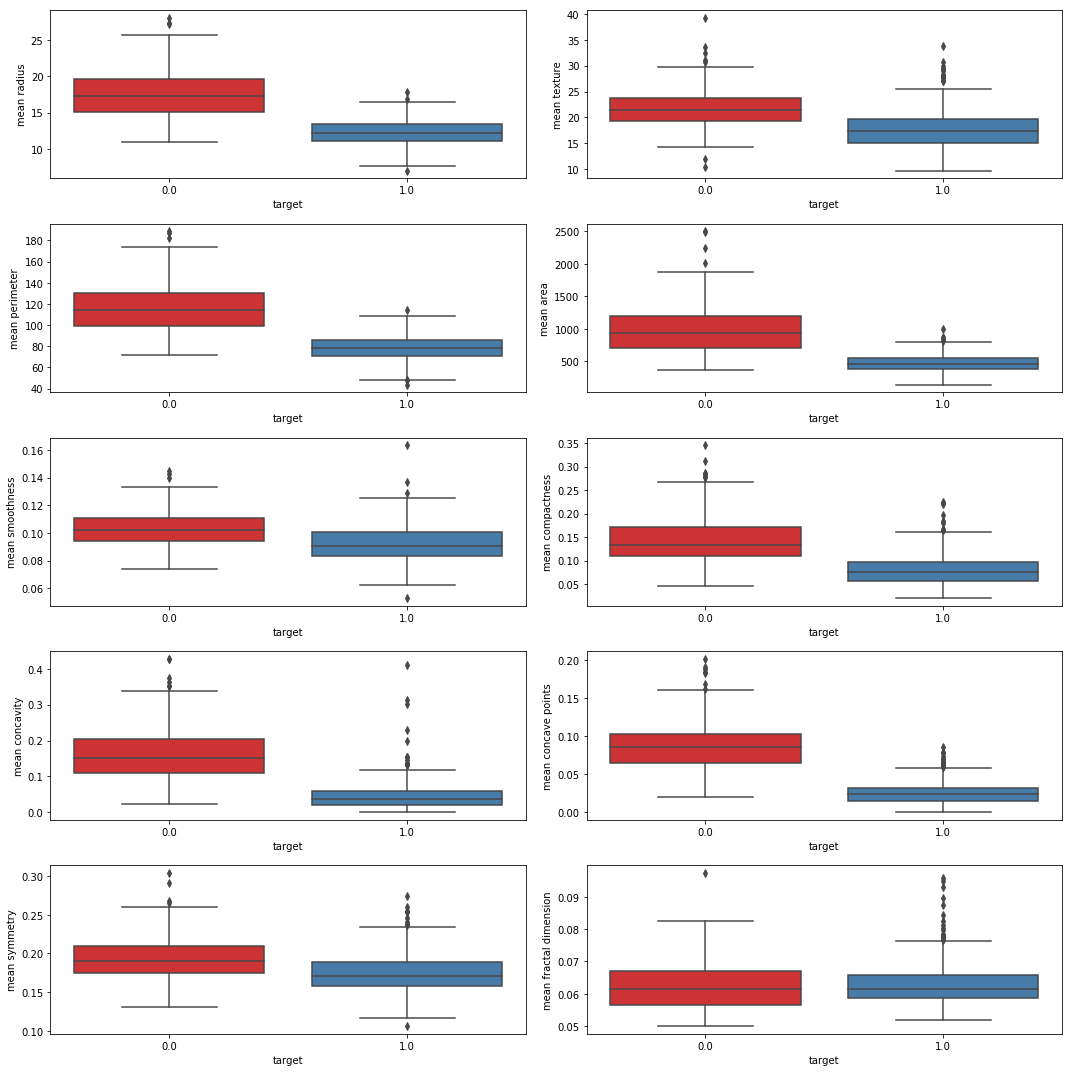

In [6]:
plt.figure(figsize=(15,15))
for k, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, k + 1)
    sns.boxplot(x='target', y=feature, data=cancerdf, palette="Set1")

plt.tight_layout()
plt.show()

### Next, visualize data in 3D

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go

# Pre-process data.
scaler = StandardScaler()
scaler.fit(cancerdf)
preprocessed_data = scaler.transform(cancerdf)

pca = PCA(n_components=3)
pca.fit(preprocessed_data)
decomposed_data = pca.transform(preprocessed_data)

# Connect notebook and download JS files.
plotly.offline.init_notebook_mode(connected=True)

# Add malignant column.
decomposed_df = pd.DataFrame(decomposed_data, columns=['x', 'y', 'z'])
decomposed_df['malignant'] = 1 - cancerData.target
 
# Create individual data sets.
malignant = decomposed_df[decomposed_df.malignant == 1]
benign = decomposed_df[decomposed_df.malignant == 0]

# Create line style.
line_style = dict(color='rgba(0, 0, 0, 0.14)',width=0.5)
 
# Create scatters.
malignant_scatter = go.Scatter3d(
    x=malignant['x'],
    y=malignant['y'],
    z=malignant['z'],
    mode='markers',
    marker=dict(
        color='rgb(181, 20, 37)',
        size=12,
        opacity=0.8,
        line=line_style
    ),
    name='Malignant'
)
benign_scatter = go.Scatter3d(
    x=benign['x'],
    y=benign['y'],
    z=benign['z'],
    mode='markers',
    marker=dict(
        color='rgb(5, 99, 226)',
        size=12,
        opacity=0.8,
        line=line_style
    ),
    name='Benign'
)
 
# Create data array. Ensure malignant scatter is rendered above (can we merge layers somehow?).
data = [benign_scatter, malignant_scatter]
 
# Create layout.
layout = go.Layout(showlegend=True, margin=dict(l=0,r=0,b=0,t=0))
 
# Render (offline).
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter')

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import time

# Building decision tree model

In [62]:
# we split the dataset into two groups namely train and test. The following gives a 426:143 split of the dataset
# we take the default split ration which is 25% test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancerData['data'], cancerData['target'], test_size=0.33, random_state=42)

# check the shape of the train and test data
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (381, 30)
Shape of y_train:  (381,)
Shape of X_test:  (188, 30)
Shape of y_test:  (188,)


In [63]:
from sklearn import tree
# we build the decision tree classified with default parameters
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_pred = clf.predict(X_test)
tree_depth = []
accuracy = []
tree_depth.append(7)
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)
#print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.3f}".format(acu))


Test set score: 0.931


##  Visualizing the decision tree

In [65]:
with open("cancer.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

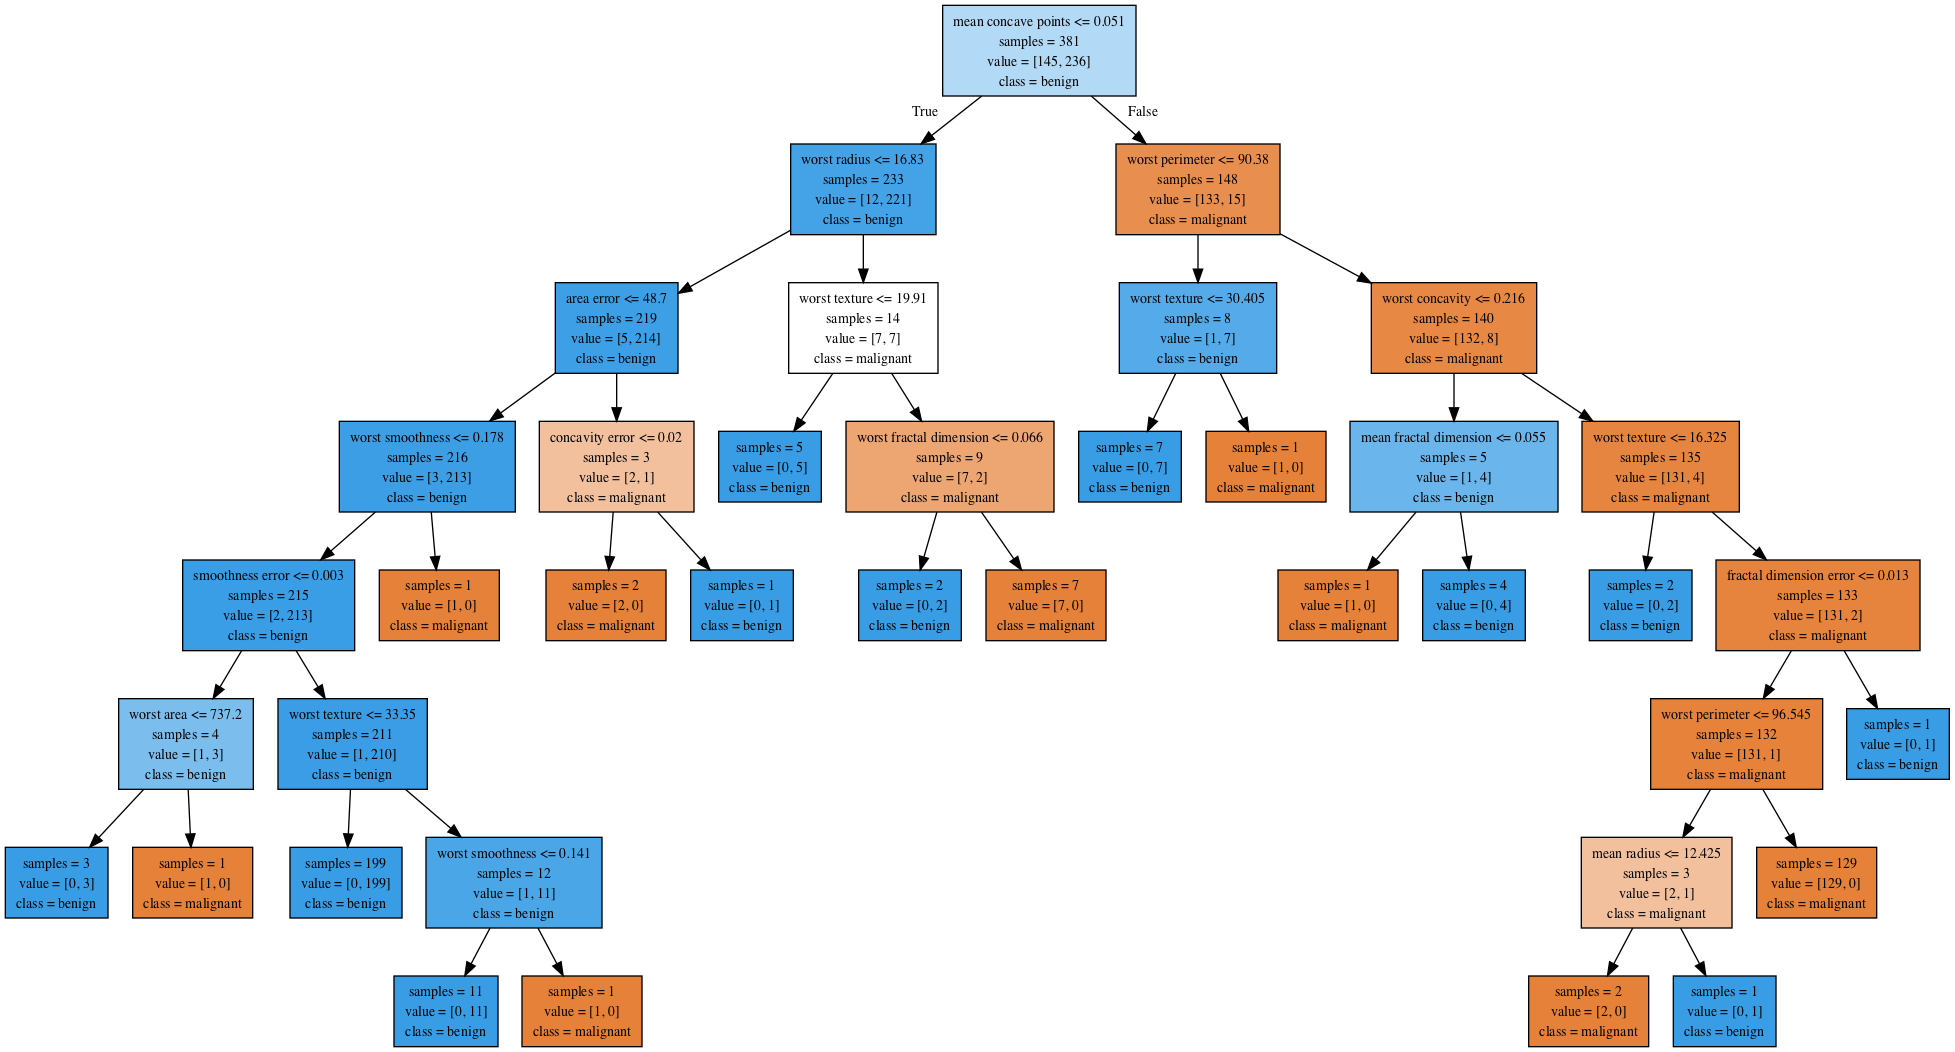

In [66]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


In [67]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

print("Dedicion Tree Accuracy: {0:.3%}".format(accuracy_score(y_test, y_pred)))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Dedicion Tree Accuracy: 93.085%
Cross validation score: 92.108% (+/- 5.85%)


In [68]:
#save the tree in a pdf file
#graph.write_pdf("cancer_tree.pdf") 

# Controlling complexity, analyzing and visualizing Decision Trees

Here we will be trying to control complexity of the decision tree with `pruning`. We will be specifically using the `max_depth` and `max_leaf_nodes` parameter of the algorithm to control the complexity.

From the above tree we see that the tree has spread to all the possible leaf nodes and it can be overfitting the samples and may not produce good predictions when given new samples for prediction. So, next we are going to prune the tree with `max_depth` value of 6, 5, 4 and 3 and compare the result.

### with max_depth == 6

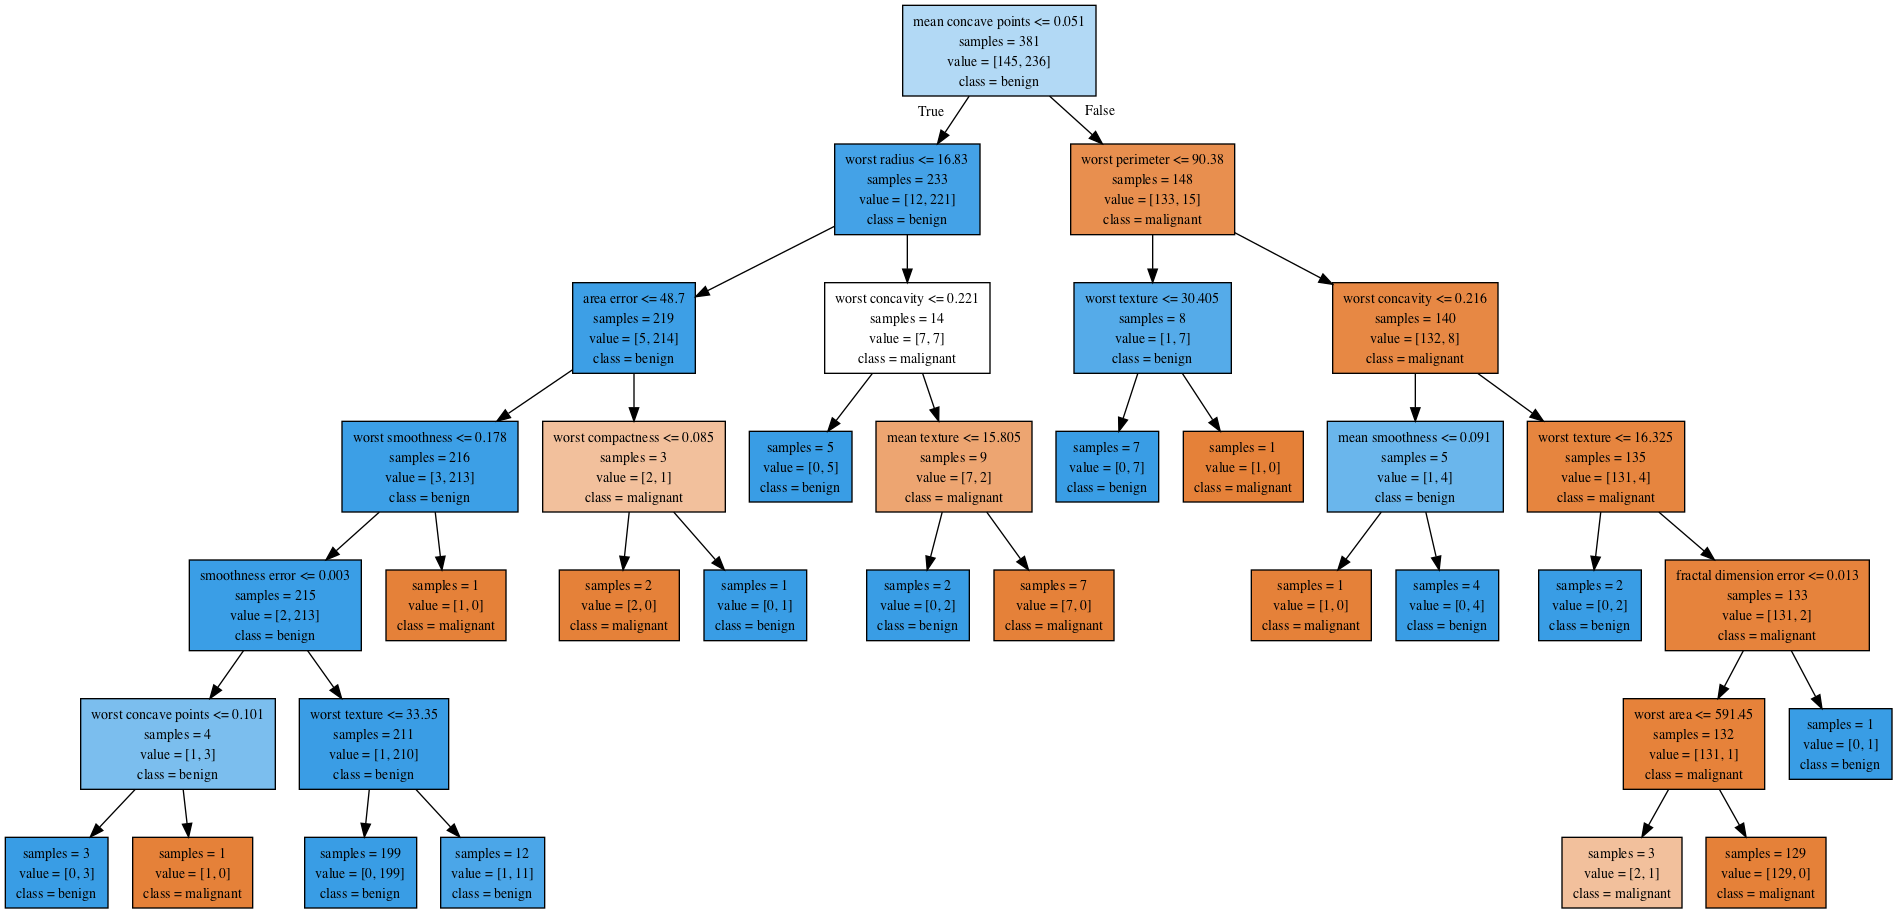

In [69]:
start = time.time()
clf = tree.DecisionTreeClassifier(max_depth=6, max_leaf_nodes=None, min_impurity_decrease=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
end = time.time()
dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [70]:
tree_depth.append(6)
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)

print("Dedicion Tree Accuracy: {0:.3%}".format(acu))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(scores.mean(), scores.std()*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 93.617%
Cross validation score: 92.371% (+/- 5.56%)
Execution time: 0.063635 seconds 



### max_depth == 5

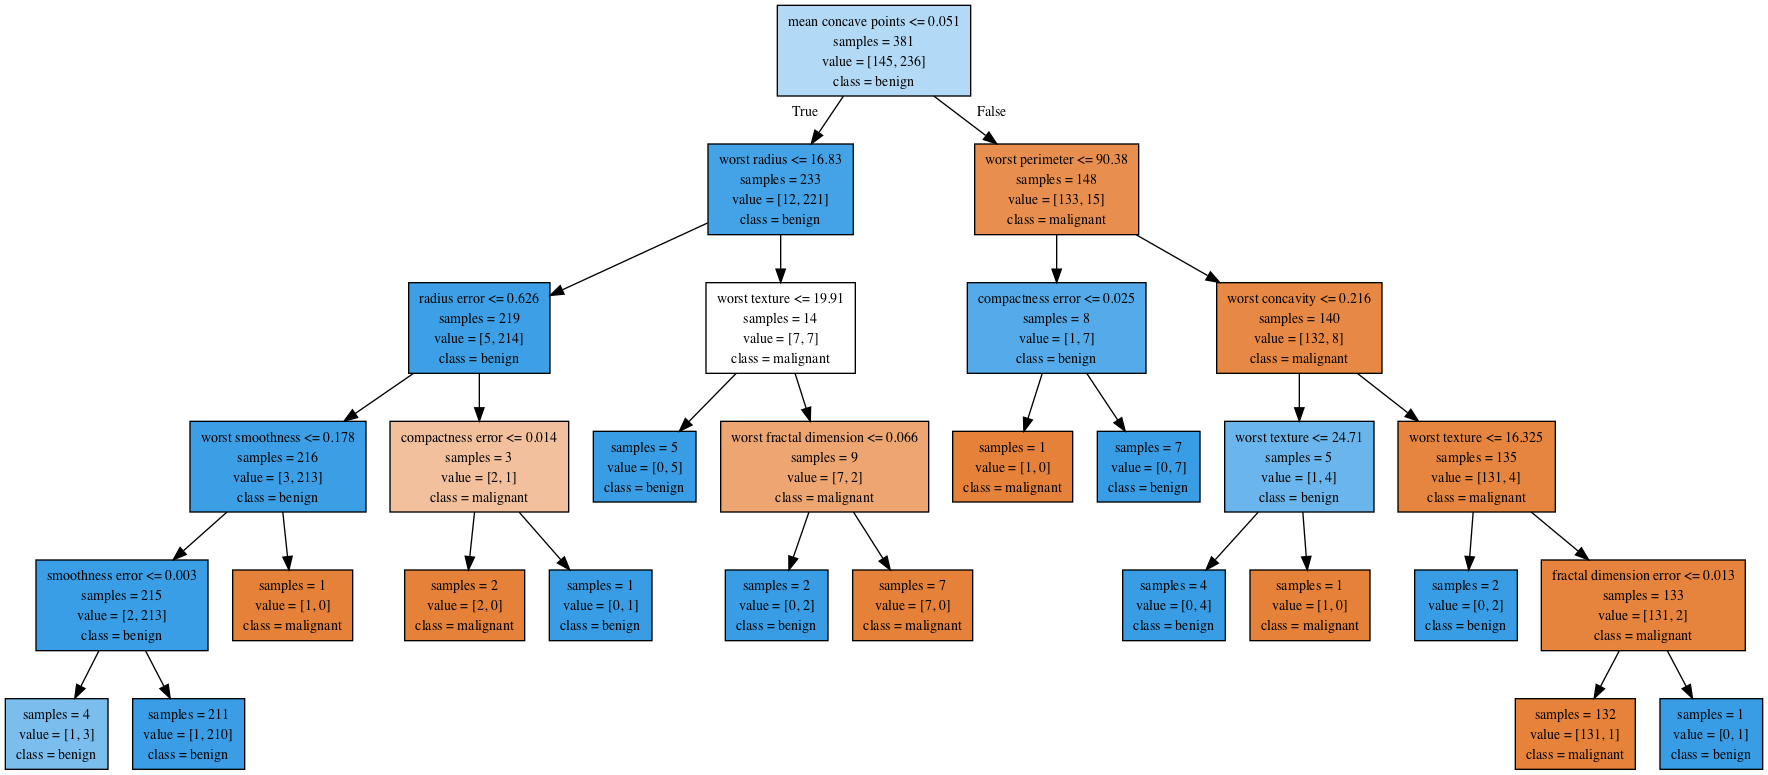

In [71]:
strt = time.time()
clf = tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_impurity_decrease=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
end = time.time()

dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [72]:
tree_depth.append(5)
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)

print("Dedicion Tree Accuracy: {0:.3%}".format(acu))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(scores.mean(), scores.std()*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 93.617%
Cross validation score: 91.331% (+/- 4.80%)
Execution time: 8.1845 seconds 



### max_depth == 4

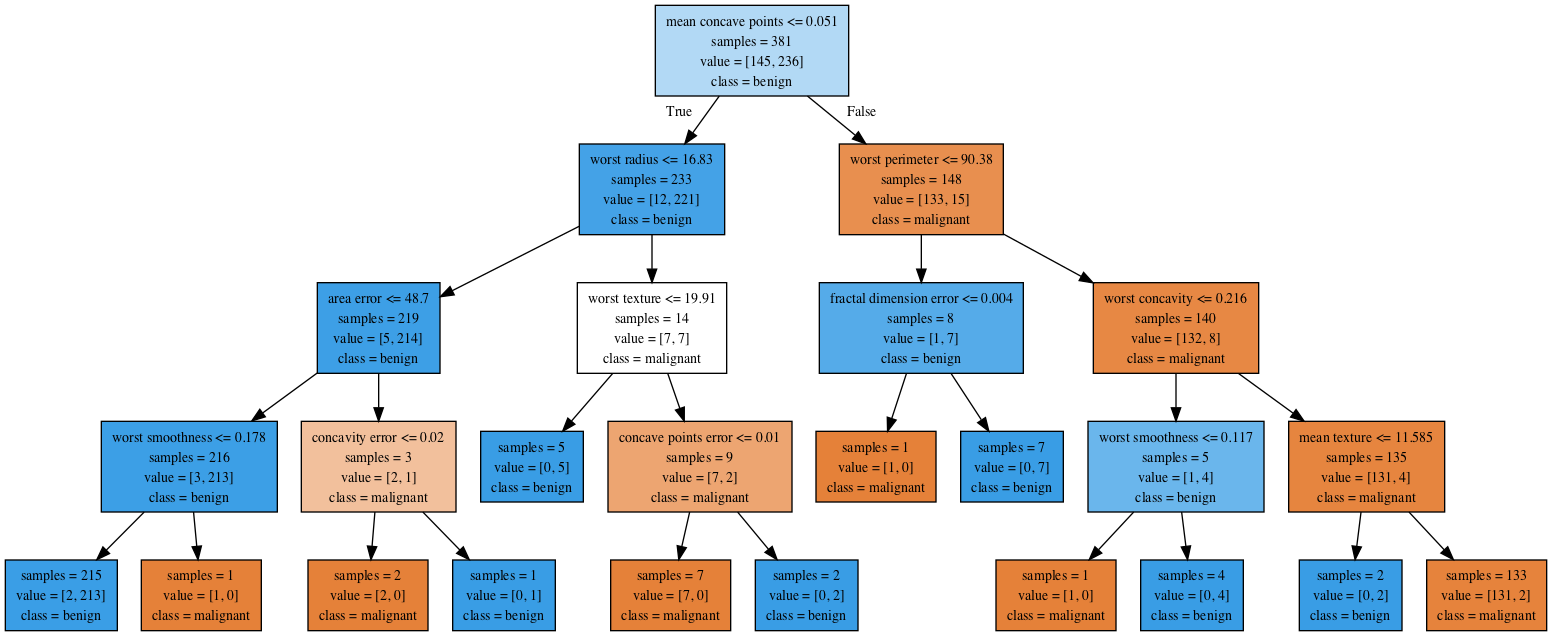

In [73]:
start = time.time()
clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_impurity_decrease=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
end = time.time()

dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [74]:
tree_depth.append(4)
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)

print("Dedicion Tree Accuracy: {0:.3%}".format(acu))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(scores.mean(), scores.std()*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 93.085%
Cross validation score: 92.371% (+/- 6.16%)
Execution time: 0.054849 seconds 



### max_depth == 3

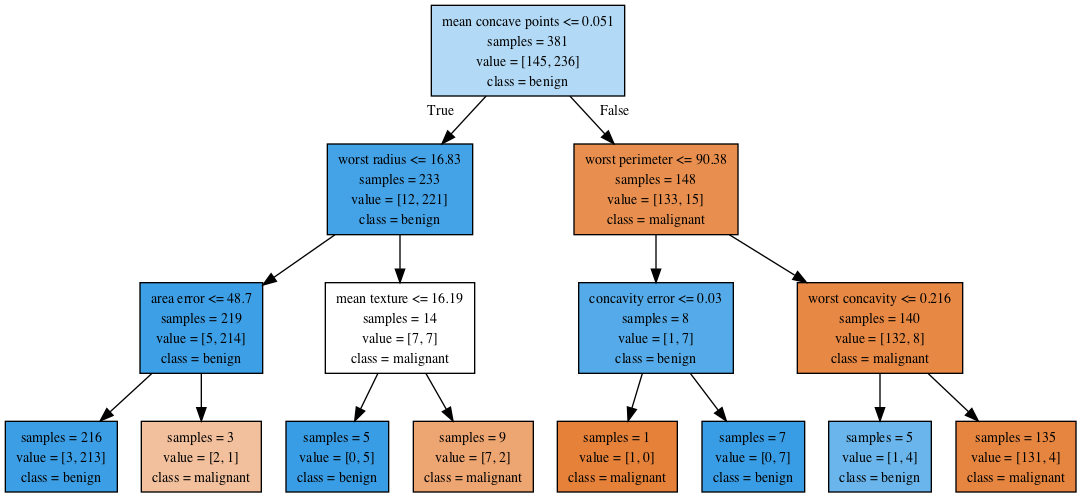

In [75]:
start = time.time()
clf = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=None, min_impurity_decrease=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
end = time.time()

dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [76]:
tree_depth.append(3)
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)

print("Dedicion Tree Accuracy: {0:.3%}".format(acu))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(scores.mean(), scores.std()*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 94.681%
Cross validation score: 92.121% (+/- 4.67%)
Execution time: 0.046786 seconds 



<Figure size 432x288 with 0 Axes>

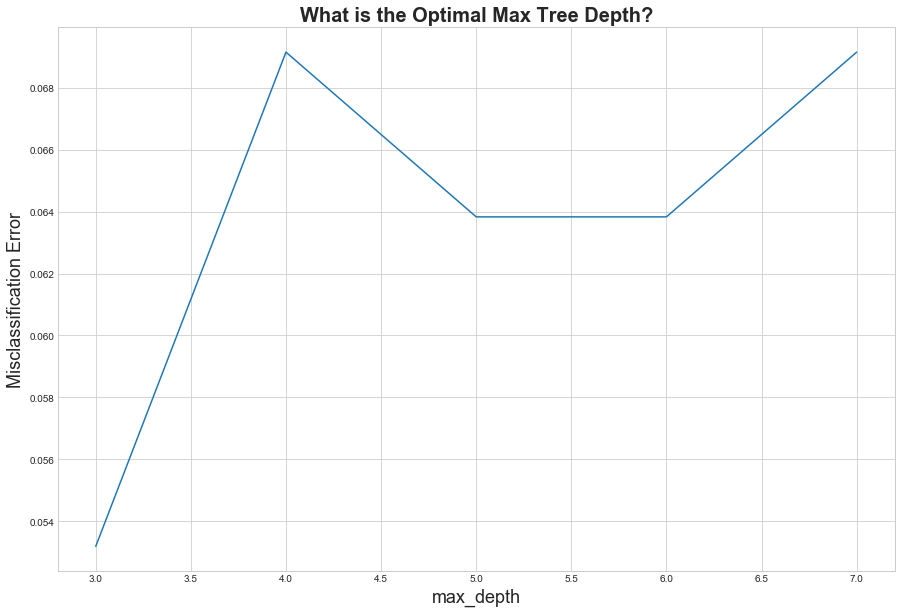

In [77]:
# plot the misclassification errors
MSE = [1 - x for x in accuracy]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('What is the Optimal Max Tree Depth?', fontsize=20, fontweight='bold')
plt.xlabel('max_depth', fontsize=18)
plt.ylabel('Misclassification Error', fontsize=18)
sns.set_style("whitegrid")
plt.plot(tree_depth, MSE)

plt.show()

#### We can see from the above line graph that the `max_depth` == (3..5)  provides the minimum misclassification error. I have noticed that the value may changed based on different run since the random sample of the training data may change during each run.
#### Next, we use the `min_samples_leaf` parameter to analyze the decision tree and find an optimal value for it.

### with min_samples_leaf == 1...10

<Figure size 432x288 with 0 Axes>

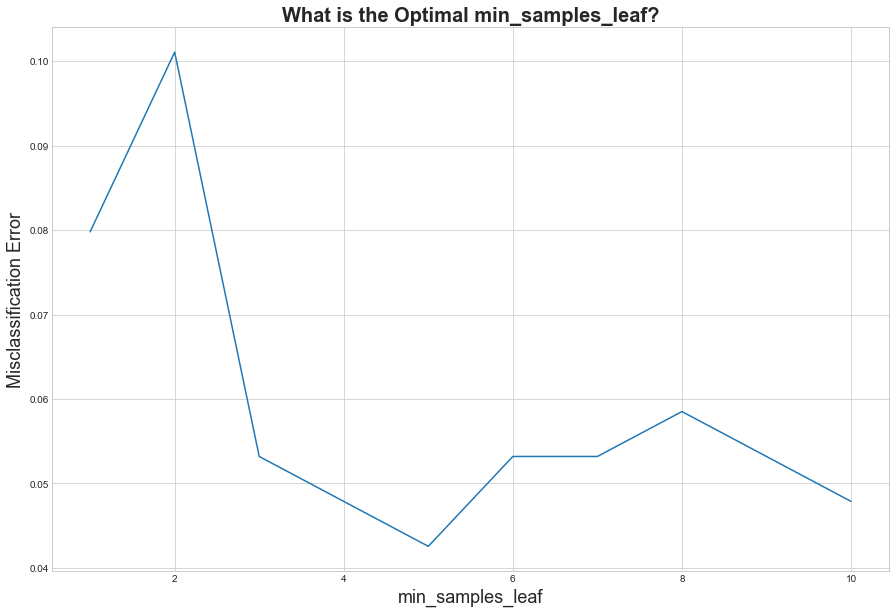

In [78]:
min_samples_leaf = [1, 2, 3, 4, 5, 6,7, 8, 9, 10]
accuracy_min_leaf = []

for k in min_samples_leaf:
    start = time.time()
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=None, min_samples_leaf=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    end = time.time()
    acu = accuracy_score(y_test, y_pred)
    accuracy_min_leaf.append(acu)

    
# plot the misclassification errors
MSE = [1 - x for x in accuracy_min_leaf]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('What is the Optimal min_samples_leaf?', fontsize=20, fontweight='bold')
plt.xlabel('min_samples_leaf', fontsize=18)
plt.ylabel('Misclassification Error', fontsize=18)
sns.set_style("whitegrid")
plt.plot(min_samples_leaf, MSE)

plt.show()

#### We can see from the above line graph that the `min_samples_leaf` == 4  or  5 provides the minimum misclassification error.

# Analyzing Feature Importance in trees

Here we will first analyze the feature importance using the `feature_importances_` attribute of the decision tree.

In [79]:
print("Feature importances:\n{}".format(clf.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.85253517 0.         0.         0.         0.
 0.         0.00719536 0.         0.00315002 0.         0.
 0.         0.         0.04053201 0.03126164 0.         0.06532579
 0.         0.         0.         0.         0.         0.        ]


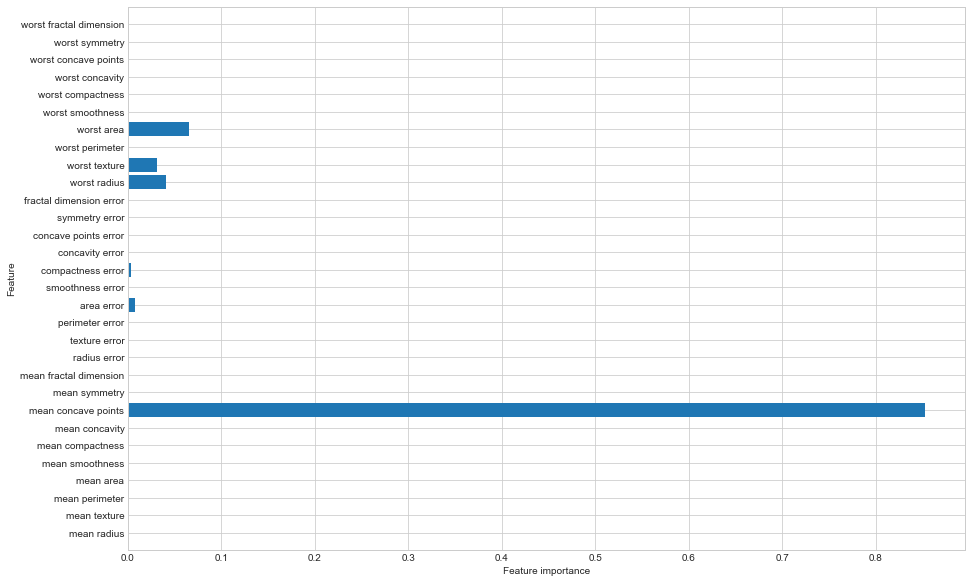

In [80]:
def plot_feature_importances_cancer(model):
    n_features = cancerData.data.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancerData.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(clf)

#### From the above graph we see that `mean concave points` is the most important feature and this can be seen as evident from all of the above trees that the first feature used for spiliting the tree is actually the `mean concave points`
#### Next, we will analyze how the `max_features` parameter value impacts on the accuracy score.

<Figure size 432x288 with 0 Axes>

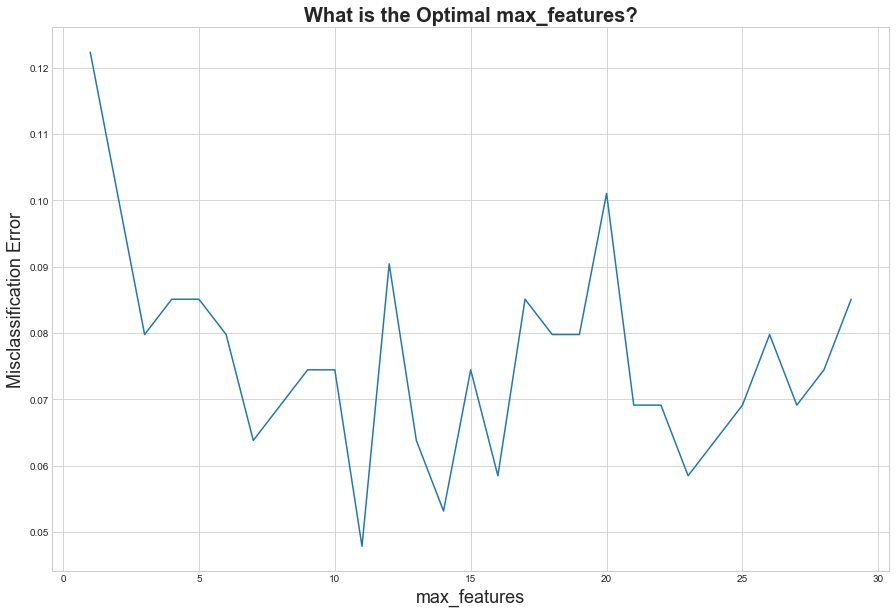

In [81]:
max_features = list(range(1,30,1))
accuracy_max_features = []

for k in max_features:
    start = time.time()
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=None, max_features=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    end = time.time()
    acu = accuracy_score(y_test, y_pred)
    accuracy_max_features.append(acu)

    
# plot the misclassification errors
MSE = [1 - x for x in accuracy_max_features]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('What is the Optimal max_features?', fontsize=20, fontweight='bold')
plt.xlabel('max_features', fontsize=18)
plt.ylabel('Misclassification Error', fontsize=18)
sns.set_style("whitegrid")
plt.plot(max_features, MSE)

plt.show()

#### Beased on all of our analysis we build our final model based on the optimal parameters that we have identified above.
#### Now with the `max_depth` == 3 and `max_features` == 14 we get the following decision tree and accuracy score
#### Note that I have noticed the optimal  `max_features` value oscilate between 10 and 15, here I am using the value 14 for next level of analysis. Same with the `max_depth` which tends to oscilate between 3 to 5

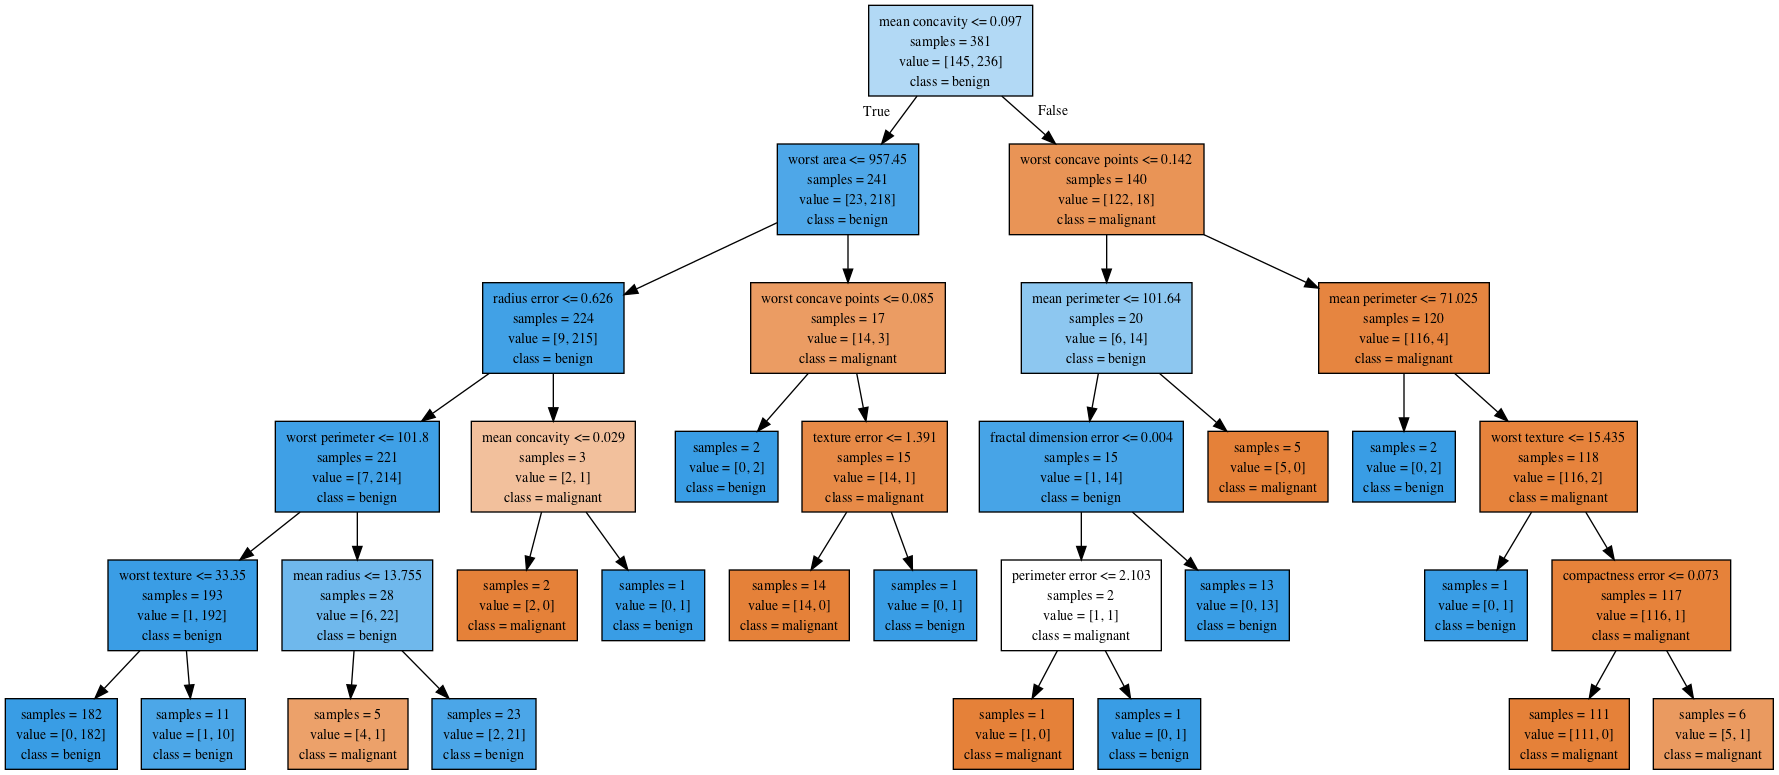

In [86]:
start = time.time()
clf = tree.DecisionTreeClassifier(max_depth=5, max_features=14)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
end = time.time()

dot_data = tree.export_graphviz(clf, out_file=None, class_names=["malignant", "benign"],
feature_names=cancerData.feature_names, impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [87]:
acu = accuracy_score(y_test, y_pred)
accuracy.append(acu)

print("Dedicion Tree Accuracy: {0:.3%}".format(acu))
print("Cross validation score: {0:.3%} (+/- {1:.2%})".format(scores.mean(), scores.std()*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 94.149%
Cross validation score: 93.154% (+/- 5.98%)
Execution time: 0.0362 seconds 



# Discuss the differences and similarities between DT models and kNN models

### In the folowing section we discuss the similarities and differences between kNN and DT

### Problem Type: Both kNN and DT models can be used for classification and regression problems. Both can handle multiclass classification. Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. kNN is also a simple learning algorithm and popular for trying out first in the analysis of finding a good learning model for a specific problem.

### Interpretability: Both kNN and DR has good Interpretability i.e. the learned model is easy to understand.

### Running time for training: For kNN the training runtime linearly increases with the sample number. With DT finding the optimal trees is computationally intractable (NP-complete), so we need to design greedy heuristics.

### Running time for predictions: Shallow trees can be extremely fast classifiers. The DT classification run time is O(log_n). For kNN the computational complexity for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario.

### Average predictive accuracy: Both of them can provide good predictive accuracy for certain problems and upto a certain accuracy level given the hyperparameters have been choosen carefully.

### Training speed:	For both kNN and DT the trining speed is relatively fast given certain parameter tuning is implemented.

### Prediction speed: For both kNN and DT the trining speed is relatively fast

### Amount of parameter tuning needed: For kNN minimal hyperparameter tuning is needed, but for DT there are a few different parameter needed to be tuned including the `features` (with the help of feature importance) for optimal model

### Handles lots of irrelevant features well (separates signal from noise)?	kNN suffers from presense of noise in the dataset. With DT noise can be reduced with feature selection.


